In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Collecting iris dataset
df = pd.read_csv("..//Iris.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of iris dataset are:-\n", df.head())

First 5 rows of iris dataset are:-
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  150
No. of column in the dataset:  5


In [4]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [5]:
# Preprocess the data to handle missing values
# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Finding Unique categories of species column
print("Types of Species: ", df['Species'].unique())

Types of Species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
# Mapping Categorical column with float64 values
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
print("Checking Dataset after mapping:-\n", df.head())

Checking Dataset after mapping:-
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


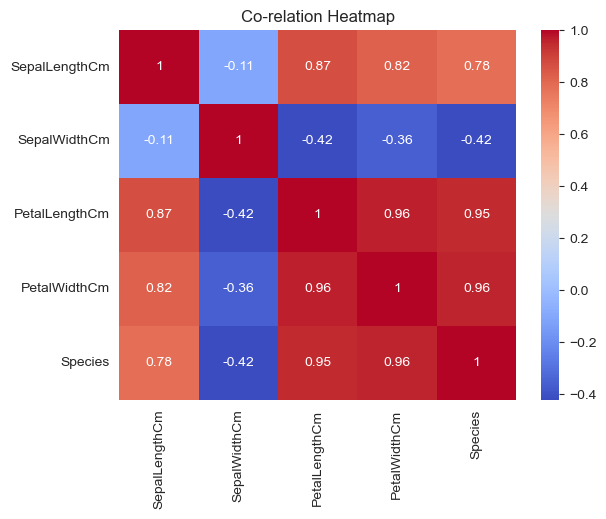

In [8]:
# Plotting the Co-relation between different features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Co-relation Heatmap")
plt.show()

In [9]:
# Features and target variable selection
features = df.drop('Species', axis='columns')
target = df.Species

In [10]:
# Splitting the dataset(70% training, 30%testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
# Display the size of the training and testing sets
print(f'Training set size: {X_train.shape[0]} samples \nTest set size: {X_test.shape[0]} samples')

Training set size: 105 samples 
Test set size: 45 samples


Creation of SVM models using different kernels.

In [11]:
# Gaussian Kernel (Radial Basis Function)
svm_rbf = SVC(kernel='rbf')
# Train the model
svm_rbf.fit(X_train, y_train)

SVC()

In [12]:
# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Polynomial kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [14]:
# Making Predictions
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

In [15]:
# Accuracy scores
acc_rbf = accuracy_score(y_test, y_pred_rbf)
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_poly = accuracy_score(y_test, y_pred_poly)

# Print or visualize the accuracy scores
print(f'Accuracy RBF: {acc_rbf}')
print(f'Accuracy Linear: {acc_linear}')
print(f'Accuracy Polynomial: {acc_poly}')

Accuracy RBF: 0.9555555555555556
Accuracy Linear: 0.9777777777777777
Accuracy Polynomial: 0.9777777777777777


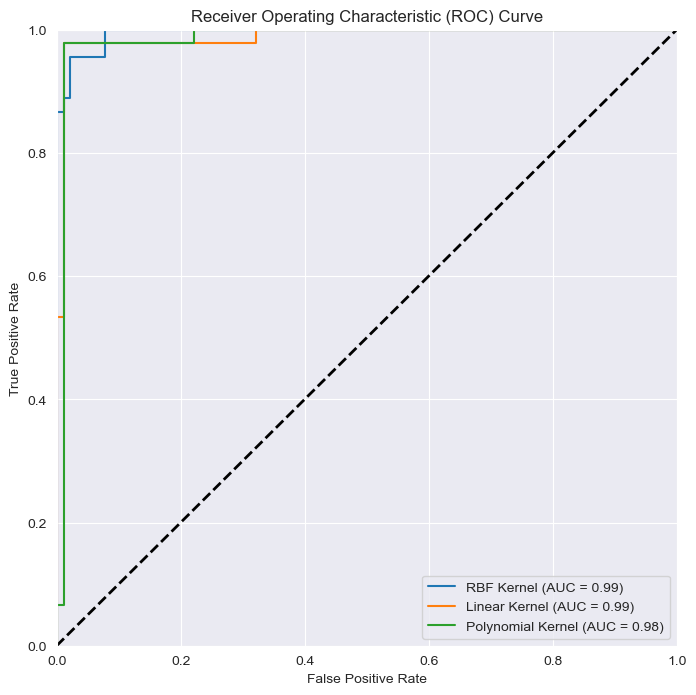

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get decision function values for each model
y_score_rbf = svm_rbf.decision_function(X_test)
y_score_linear = svm_linear.decision_function(X_test)
y_score_poly = svm_poly.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr_rbf, tpr_rbf, _ = roc_curve(y_test_bin.ravel(), y_score_rbf.ravel())
fpr_linear, tpr_linear, _ = roc_curve(y_test_bin.ravel(), y_score_linear.ravel())
fpr_poly, tpr_poly, _ = roc_curve(y_test_bin.ravel(), y_score_poly.ravel())

# Compute AUC for each class
auc_rbf = auc(fpr_rbf, tpr_rbf)
auc_linear = auc(fpr_linear, tpr_linear)
auc_poly = auc(fpr_poly, tpr_poly)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF Kernel (AUC = {auc_rbf:.2f})')
plt.plot(fpr_linear, tpr_linear, label=f'Linear Kernel (AUC = {auc_linear:.2f})')
plt.plot(fpr_poly, tpr_poly, label=f'Polynomial Kernel (AUC = {auc_poly:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()